# RLC Netzwerke #

In [9]:
# Initialisierung
import numpy as np
import sympy as sym
import scipy.linalg as sp

# eigene Funktionen
def eliminate(Aa_in, tolerance=np.finfo(float).eps*10., fix=False, verbos=0):
    # eliminates first row
    # assumes Aa is np.array, As.shape>(1,1)
    Aa = Aa_in
    Nn = len(Aa)
    # Mm = len(Aa[0,:])
    if (Nn < 2):
        return Aa
    else:
        if not fix:
            prof = np.argsort(np.abs(Aa_in[:, 0]))
            Aa = Aa[prof[::-1]]
        if np.abs(Aa[0, 0]) > tolerance:
            el = np.eye(Nn)
            el[0:Nn, 0] = -Aa[:, 0] / Aa[0, 0]
            el[0, 0] = 1.0 / Aa[0, 0]
            if (verbos > 50):
                print('Aa \n', Aa)
                print('el \n', el)
                print('pr \n', np.matmul(el, Aa))
            return np.matmul(el, Aa)
        else:
            return Aa


def FirstNonZero(lis):
    return next((i for i, x in enumerate(lis) if x), len(lis)-1)


def SortRows(Aa):
    inx = np.array(list(map(FirstNonZero, Aa)))
    #print('inx: ',inx,inx.argsort())
    return Aa[inx.argsort()]


def mrref(Aa_in, verbos=0):
    Aa = Aa_in*1.0
    Nn = len(Aa)
    kklist = np.arange(0, Nn - 1)
    #print('kklist', kklist)
    for kk in kklist:
        Aa[kk:, kk:] = eliminate(Aa[kk:, kk:], verbos=verbos-1)
    Aa = SortRows(Aa)
    Aa = np.flipud(Aa)
    # for kk in kklist:
    for kkh in kklist:
        kk = FirstNonZero(Aa[kkh, :])
        Aa[kkh::, kk::] = eliminate(Aa[kkh::, kk::], fix=True, verbos=verbos-1)
    return np.flipud(Aa)


def mnull(Aa_in,leps=np.finfo(float).eps*10,verbos=0):
    Aa=mrref(Aa_in) 
    Aa=Aa[list(map(np.linalg.norm,Aa  ))>leps] # extract non-zero linies
    mpiv=np.array(Aa[0]*0,dtype=bool)
    jj=0 # setup mask, indicating pivot-variables
    for ro in Aa>leps:
        for x in ro[jj:]:
            if x:
                mpiv[jj]=True
                jj=jj+1
                break
    
    jj=0 ; la=Aa[:,mpiv] ; veo=[]
    for jj in  np.argwhere(mpiv==False): 
        ve=np.linalg.lstsq(la, -Aa[:,jj],rcond=None)[0]
        vel=np.zeros((len(mpiv)))
        vel[mpiv]=ve[:,0] ; vel[jj]=1
        veo.append(vel)
 
    opt=np.array(veo).T
    if (verbos>10):
        print(Aa.shape,opt.shape)
        print('Test: ',np.matmul(Aa,opt))
    return opt

def Zl(Ll,ww=0):
    return np.array([[0,ww *Ll],[-ww*Ll,0]])

def Zc(Cc,ww=1):
    return np.array([[0,-1/(ww*Cc)],[1/(ww*Cc),0]])

def Zr(Rr,ww=0):
    return np.eye(2)*Rr 

# Beispiel 14.7 CL Schaltkreis #

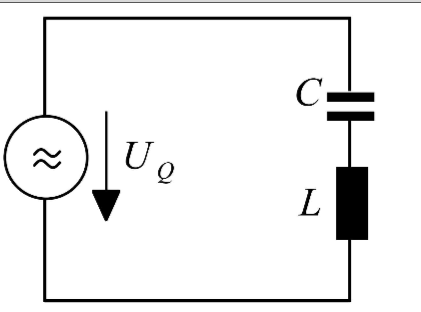

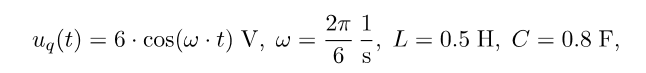

In [3]:
# Werte von der Aufgabe hinzufügen
ww = (2*np.pi)/6
Ll = 0.5
Cc = 0.8
u = np.array([[6], [0]])

#el =-1/(ww*0.8)+ww*0.5

#Zl erstellen
ZL = Zl(Ll, ww)

#Zc erstellen
ZC = Zc(Cc, ww)

#Zt ausrechnen
Zt = ZL + ZC

#Ausgabe von der Gesammtimpedanz
print("Gesammtimpedanz:\n", Zt)

Gesammtimpedanz:
 [[ 0.        -0.6700633]
 [ 0.6700633  0.       ]]


In [5]:
# Lösungen ausrechnen.
# Hier muss die Inverse von dem Impedanz Matrix benutzt werden. U = Ztot @ i Umgeformt nach i => Ztot^-1 @ u = i
A = np.linalg.inv(Zt)@u
print("Stromvektor:\n", A)

Stromvektor:
 [[ 0.        ]
 [-8.95437792]]


# Beispiel 14.8 c #

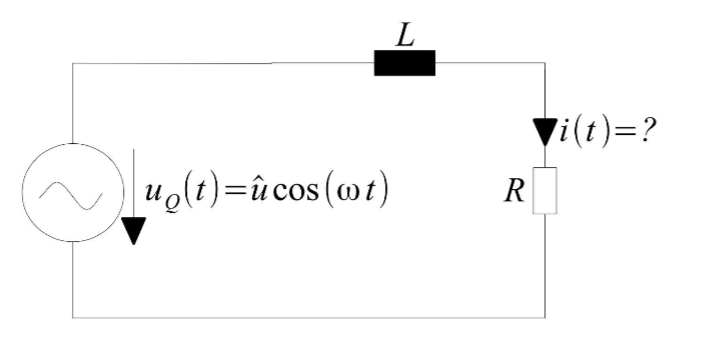

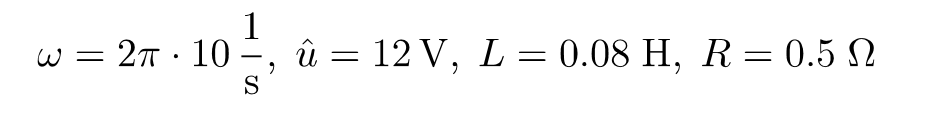


In [10]:
# Werte von der Aufgabe hinzufügen
ww = (2*np.pi)*10
Ll = 0.08
R = 0.5
u = np.array([[12], [0]])

#el =-1/(ww*0.8)+ww*0.5

#Zl erstellen
ZL = Zl(Ll, ww)

#Zc erstellen
ZR = Zr(R,ww)

#Zt ausrechnen
Zt = ZL + ZR

#Ausgabe von der Gesammtimpedanz
print("Gesammtimpedanz:\n", Zt)

Gesammtimpedanz:
 [[ 0.5         5.02654825]
 [-5.02654825  0.5       ]]


In [11]:
# Lösungen ausrechnen.
# Hier muss die Inverse von dem Impedanz Matrix benutzt werden. U = Ztot @ i Umgeformt nach i => Ztot^-1 @ u = i
A = np.linalg.inv(Zt)@u
print("Stromvektor:\n", A)

Stromvektor:
 [[0.23514485]
 [2.36393386]]
